# Spencer Peters
## Project 03

### Purpose/Abstract

The book that will be mentioned throughout this notebook is Computational Modeling and Visualization of Physical Systems with Python By J. Wang

In this project, I am modeling the Lorenz model to see how different values evoke chaotic behaviors. In my first three models my sigma and b stayed the same the only changing variable was R. In the first two you can see how there is normal periodic behavior but when are is incremented to 28 a chaotic behavior appears. I also am modeling the Rössler Model which shows chaotic behaviors with a middle fixed point attractor. The goal of this is to gain an understanding of chaotic attractors and how you can change one value and create a chaotic state. After completion of both these models, I found the Lorenz model has two "eye" like steady states where the model loops around in its chaotic state (i.e two fixed point attractors) versus the Rössler model which shows us a chaotic state with a single fixed point

### Theoretical Model

The Lorenz Model is being shown using the following ODEs to calculate the points

$$\frac{\mathrm{d} x}{\mathrm{d} t} = -\sigma(x-y)$$

$$\frac{\mathrm{d} y}{\mathrm{d} t} = x(r-z)-y$$

$$\frac{\mathrm{d} z}{\mathrm{d} t} = xy-bz$$



In [3]:
#import ode #if you have ode.py in the same folder as your notebook
from mpl_toolkits import mplot3d
import compy.ode as cp
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def lorenz(rval):
    x = 0
    y = 1
    z = 0
    global sigma
    sigma = 10
    global b
    b = 8/3
    global r
    r = rval
    data = np.array([x,y,z])
    t = 0
    h = 0.005
    Nsteps = int(30/h)

    global plotdata
    plotdata = np.zeros((Nsteps,4))
    plotdata[0,:] = np.array([t,x,y,z])

    for n in range(0,Nsteps-1):
        data = cp.RK4(model, data, t, h)
        t = t + h
        plotdata[n+1,:] = np.array([t,data[0],data[1],data[2]])

def model(d,t):
    der = np.zeros(3)
    x = d[0]
    y = d[1]
    z = d[2]
    der[0] = -sigma*(x-y)
    der[1] = x*(r-z)-y
    der[2] = x*y - b*z
    return der

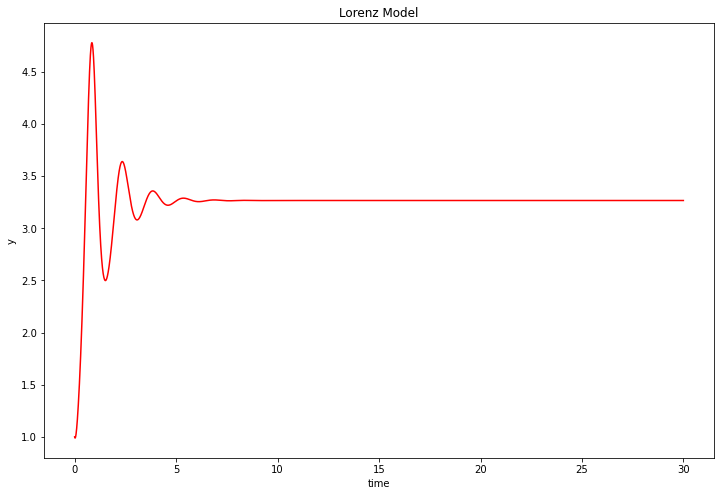

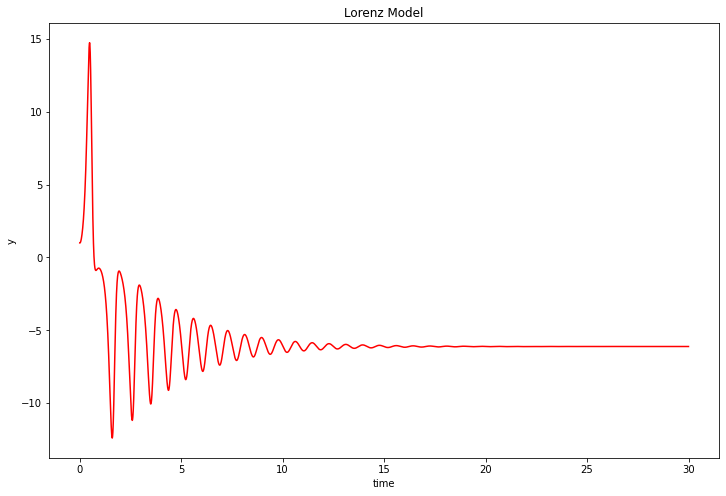

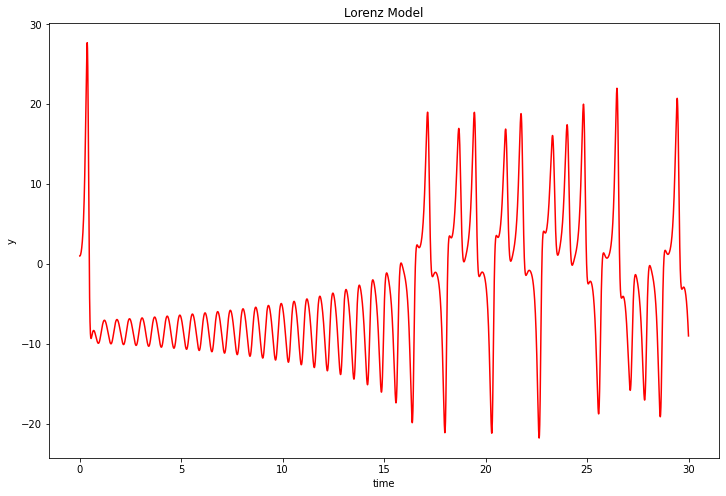

In [6]:
lorenz(5)
plt.figure(figsize=(12,8))
plt.title("Lorenz Model")
plt.plot(plotdata[:,0],plotdata[:,2],"r-")
plt.xlabel("time")
plt.ylabel("y")
plt.show()
lorenz(15)
plt.figure(figsize=(12,8))
plt.title("Lorenz Model")
plt.plot(plotdata[:,0],plotdata[:,2],"r-")
plt.xlabel("time")
plt.ylabel("y")
plt.show()
lorenz(28)
plt.figure(figsize=(12,8))
plt.title("Lorenz Model")
plt.plot(plotdata[:,0],plotdata[:,2],"r-")
plt.xlabel("time")
plt.ylabel("y")
plt.show()

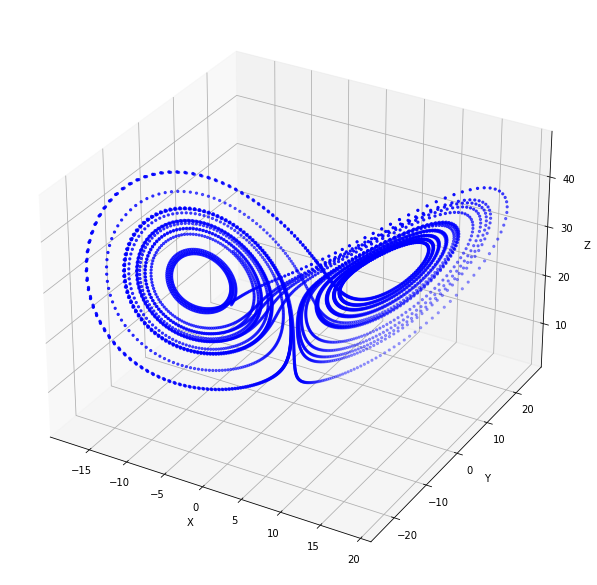

In [5]:
def lorenz(rval):
    x = -7
    y = -2
    z = 30
    global sigma
    sigma = 10
    global b
    b = 8/3
    global r
    r = rval
    data = np.array([x,y,z])
    t = 0
    h = 0.005
    Nsteps = int(30/h)

    global plotdata
    plotdata = np.zeros((Nsteps,4))
    plotdata[0,:] = np.array([t,x,y,z])

    for n in range(0,Nsteps-1):
        data = cp.RK4(model, data, t, h)
        t = t + h
        plotdata[n+1,:] = np.array([t,data[0],data[1],data[2]])
  
lorenz(28)  
# syntax for 3-D projection 
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111, projection='3d')

# Generate the values
x_vals = plotdata[:,1]
y_vals = plotdata[:,2]
z_vals = plotdata[:,3]

# Plot the values
ax.scatter(x_vals, y_vals, z_vals, c = 'b', marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## Rössler Attractor

### Theoretical Model
Shows us a single fixed point attractor of a chaotic state with intial values of 0.42399 for A, 2 for B and 4 for C. Minipulating the value of A makes the difference between a stable state and a chaotic state
http://www.scholarpedia.org/article/Rossler_attractor

$$\frac{\mathrm{d} x}{\mathrm{d} t} = -(y-z)$$

$$\frac{\mathrm{d} y}{\mathrm{d} t} = x+Ay$$

$$\frac{\mathrm{d} z}{\mathrm{d} t} = B+z(x−c)$$

Uncomment the A value to see a chaotic state (current state is stable)

In [38]:
def rossler():
    global A
    global B
    global C
    # UNCOMMENT LINE BELOW TO CHANGE TO CHAOTIC STATE
    #A = 0.43299 #Chaotic State 
    A = 0.40 #Stable State
    B = 2
    C = 4
    x = 0
    y = 0 
    z = 0
    data = np.array([x,y,z])
    t = 0
    h = 0.005
    Nsteps = int(100/h)

    global plotdata
    plotdata = np.zeros((Nsteps,4))
    plotdata[0,:] = np.array([t,x,y,z])

    for n in range(0,Nsteps-1):
        data = cp.RK4(model, data, t, h)
        t = t + h
        plotdata[n+1,:] = np.array([t,data[0],data[1],data[2]])

def model(d,t):
    der = np.zeros(3)
    x = d[0]
    y = d[1]
    z = d[2]
    der[0] = -(y+z)
    der[1] = x+A*y
    der[2] = B + x*z - C*z
    return der

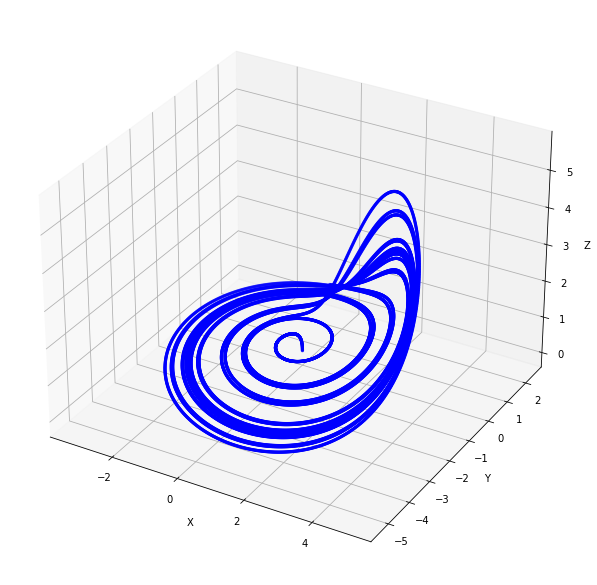

In [36]:
rossler()
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111, projection='3d')

# Generate the values
x_vals = plotdata[:,1]
y_vals = plotdata[:,2]
z_vals = plotdata[:,3]

# Plot the values
ax.scatter(x_vals, y_vals, z_vals, c = 'b', marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### Validation

What leads you to believe your simulation correctly models the system?
The main point for why I believe my simulations are correct is due to the book and numerous other websites learning about the Lorenz and Rossler models. The pictures and diagrams were helpful in my 3D rendering of both models, both of my models replicated what was in the book for the Lorenz model and what was online for the Rossler Model. Unlike the last lab, I didn't run into discovery when trying to replicate the books model but instead was able to successfully replicate Dr. Wangs model. The lab mentioned was the Magnus Effect lab also in this portfolio. Click [here](https://github.com/SpencerTP31/PHY_2200_Portfolio/tree/main/Magnus_Effect) to see that lab

### Results/Conclusion

Based on my models and with help from outside resources I was able to create both models with the desired chaotic state. With the Lorenz Model on a 2D graph, I was able to see how altering the R-value I was able to create a chaotic state which I used my knowledge from that to create a chaotic state in the Rossler Model. It seems when the value of R goes over 28 a chaotic state is present in the Lorenz Model meanwhile when A goes over a value of 0.43295 a chaotic state is reached